<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#House-Price-Prediction" data-toc-modified-id="House-Price-Prediction-1">House Price Prediction</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Understanding-the-81-Columns" data-toc-modified-id="Understanding-the-81-Columns-1.2">Understanding the 81 Columns</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.2.1">Importing Libraries</a></span></li><li><span><a href="#Important-features-about-building" data-toc-modified-id="Important-features-about-building-1.2.2">Important features about building</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.3">Visualization</a></span><ul class="toc-item"><li><span><a href="#Location-Features" data-toc-modified-id="Location-Features-1.3.1">Location Features</a></span><ul class="toc-item"><li><span><a href="#Zones-vs-SalePrice-of-House" data-toc-modified-id="Zones-vs-SalePrice-of-House-1.3.1.1">Zones vs SalePrice of House</a></span></li><li><span><a href="#Landcantour-vs-SalePrice" data-toc-modified-id="Landcantour-vs-SalePrice-1.3.1.2">Landcantour vs SalePrice</a></span></li><li><span><a href="#Driveway-vs-SalePrice" data-toc-modified-id="Driveway-vs-SalePrice-1.3.1.3">Driveway vs SalePrice</a></span></li></ul></li><li><span><a href="#Space-Features" data-toc-modified-id="Space-Features-1.3.2">Space Features</a></span></li></ul></li></ul></li></ul></div>

# House Price Prediction 
Author : Aakash Nand
Date 24th July 2019

## Introduction
Buying a dream home is always a difficult tasks when it comes to ameneties and convinience. This dataset has collected more than 80 such factors which could affect the decision and price of house sale. This is my second competition in which my ultimate goal is to predict the house prices. Meanwhile to achieve that I am going to try to understand the overwhelming columns.

## Understanding the 81 Columns
As I downloaded the dataset, it was quiet overwhelming to see these many columns and I was thinking may be I have selected the wrong the dataset for begineer but I will have to start somewhere anyways hence lets proceed. I tried to understand the data_description.txt given in this dataset but still was not able to come up with any idea on how to proceed. This is where Kaggle Kernels play really important role. Understanding someone else's work and replicating it is also one of the important point, hence I decided to take some inspiration from [Pedro Marcelino's](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) kernel. He had this brilliant idea to analyze each feature by category. For example, each feature can be analyzed in following ways.

 * <b> Type of feature: </b>  [ Numerical, Categorical ]
 * <b> Information : </b> What type of information this variable provides. Does it provide information about buidling feature? Does it provide information about space of the buidling? Does it provide information about location/accessibility of the building [ Building, Space, Location ]
 * <b> Relativity to the target feature: </b> According to our own sense, how much this variable could affect the saleprice of the house [ High, Medium, Low ] </b>
 
I created excel sheet of all columns and analyzed them using above idea. Once this is done we can get a glimpse of all feature. Lets understand them one by one.




### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from fastai.structured import *
pd.set_option('display.max_colwidth', -1) ## display full width of column
feature_info=pd.read_excel('feature_analysis.xlsx',usecols=list(range(0,5)))

### Important features about building

In [2]:
feature_info[(feature_info.Information=='building')&(feature_info.Relativity=='high')]

,Variable,Type,Information,Relativity,Comment
1,MSSubClass,categorical,building,high,Identifies the type of dwelling involved in the sale.
7,LotShape,categorical,building,high,General shape of property
9,Utilities,categorical,building,high,Type of utilities available
15,BldgType,categorical,building,high,Type of dwelling
16,HouseStyle,categorical,building,high,Style of dwelling
17,OverallQual,categorical,building,high,Rating of the overall material and finish of the house
18,OverallCond,categorical,building,high,Rating of the overall condition of the house
19,YearBuilt,numerical,building,high,Original construction date
20,YearRemodAdd,numerical,building,high,Remodel date (same as construction date if no remodeling or additions)
21,RoofStyle,categorical,building,high,Type of roof


From the above we reduced our focus on total 49 features which are important. Next we will try to visualize them using matplotlib and see their relationship with SalesPrice.

## Visualization
Lets load the training dataset in train dataframe. We will create visulization mainly from above features. Lets start with `Location` then `Space` and then finally, `Building`

### Location Features

Lets see what are the important features related to location features of house.

In [10]:
feature_info[(feature_info.Information=='location')&(feature_info.Relativity=='high')]

,Variable,Type,Information,Relativity,Comment
2,MSZoning,categorical,location,high,Identifies the general zoning classification of the sale.
8,LandContour,categorical,location,high,Flatness of the property
65,PavedDrive,categorical,location,high,Paved driveway


#### Zones vs SalePrice of House

([<matplotlib.axis.XTick at 0x1c2fc96ef0>,
 <a list of 5 Text xticklabel objects>)

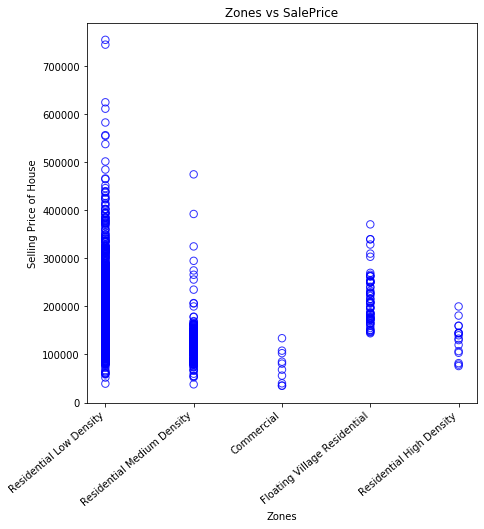

In [6]:
train=pd.read_csv("./data/train.csv")
figure(figsize=(7,7))
plt.scatter(x='MSZoning',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='blue',s=55)
plt.title("Zones vs SalePrice")
plt.xlabel('Zones')
plt.ylabel('Selling Price of House')
plt.xticks(ticks=range(0,5),labels=['Residential Low Density','Residential Medium Density','Commercial','Floating Village Residential','Residential High Density'],rotation=40,ha="right")

It looks people prefer less densed area for buying home. Commericial area must be expensive hence we can see less people are interested in commercial area.

#### Landcantour vs SalePrice

([<matplotlib.axis.XTick at 0x1c34466438>,
 <a list of 4 Text xticklabel objects>)

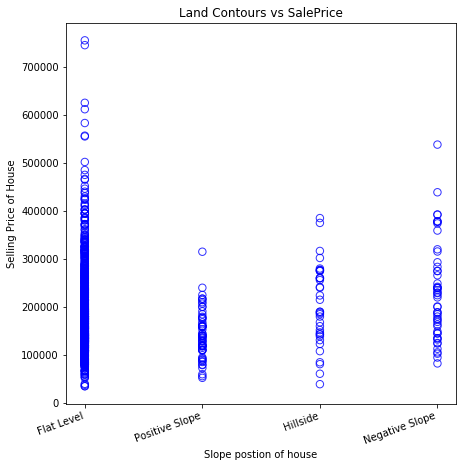

In [5]:
figure(figsize=(7,7))
plt.scatter(x='LandContour',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='blue',s=55)
plt.title("Land Contours vs SalePrice")
plt.xlabel('Slope postion of house')
plt.ylabel('Selling Price of House')
plt.xticks(ticks=range(0,4),labels=['Flat Level','Positive Slope','Hillside','Negative Slope'],rotation=20,ha="right")

Its quiet obvious that everyone prefers flat level of area.

#### Driveway vs SalePrice

([<matplotlib.axis.XTick at 0x1c342f8160>,
 <a list of 3 Text xticklabel objects>)

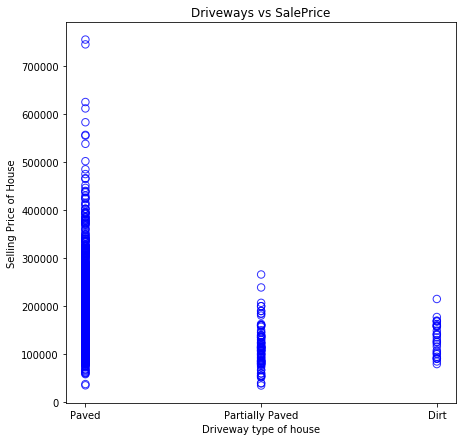

In [4]:
figure(figsize=(7,7))
plt.scatter(x='PavedDrive',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='blue',s=55)
plt.title("Driveways vs SalePrice")
plt.xlabel('Driveway type of house')
plt.ylabel('Selling Price of House')
plt.xticks(ticks=range(0,3),labels=['Paved','Partially Paved','Dirt'])

Again its obvious that everyone prefers to drive on paved road and would like to have one around their house.

### Space Features

In [ ]:
Lets see what are the important features related to space characteristics of house.

In [13]:
space_features=feature_info[(feature_info.Information=='space')&(feature_info.Relativity=='high')]
space_features

,Variable,Type,Information,Relativity,Comment
4,LotArea,numerical,space,high,Lot size in square feet
46,GrLivArea,numerical,space,high,Above grade (ground) living area square feet
61,GarageCars,numerical,space,high,Size of garage in car capacity
62,GarageArea,numerical,space,high,Size of garage in square feet
69,3SsnPorch,numerical,space,high,This variable describes the area of space which is similar to Veranda
70,ScreenPorch,numerical,space,high,Screen porch area in square feet


Most of the features related to space are numerical. Lets see how are they related to SalesPrice.
Before we visualize them lets see how much missing values these features have.

In [27]:
(train.iloc[:,[4,46,61,62,69,70]]==0).sum(axis=0)

LotArea        0   
GrLivArea      0   
GarageCars     81  
GarageArea     81  
3SsnPorch      1436
ScreenPorch    1344
dtype: int64

In [54]:
space_features.Variable.iloc[2]
plt.scatter()

'GarageCars'

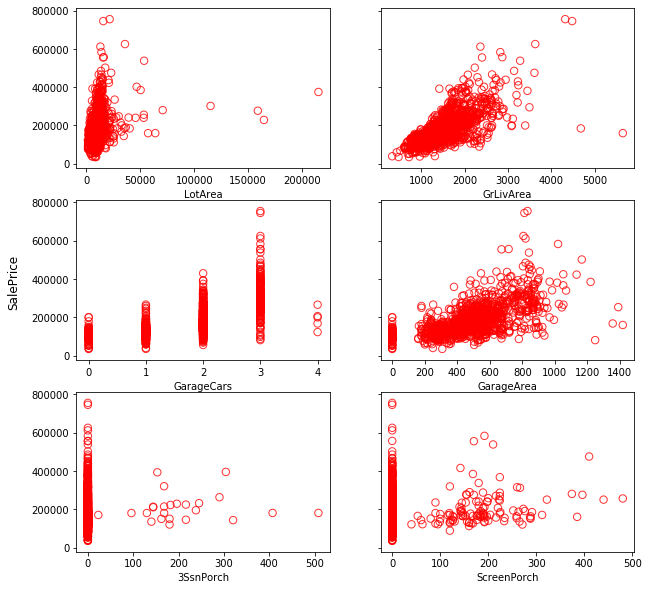

In [101]:

#plt.scatter(x='3SsnPorch',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='blue',s=55)
# plt.title("Driveways vs SalePrice")
# plt.xlabel('Driveway type of house')
# plt.ylabel('Selling Price of House')
# plt.xticks(ticks=range(0,3),labels=['Paved','Partially Paved','Dirt'])
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10),sharey=True)

ax[0,0].scatter(x='LotArea',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[0,0].set_xlabel('LotArea')

ax[0,1].scatter(x='GrLivArea',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[0,1].set_xlabel('GrLivArea')

ax[1,0].scatter(x='GarageCars',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[1,0].set_xlabel('GarageCars')

ax[1,1].scatter(x='GarageArea',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[1,1].set_xlabel('GarageArea')

ax[2,0].scatter(x='3SsnPorch',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[2,0].set_xlabel('3SsnPorch')

ax[2,1].scatter(x='ScreenPorch',y='SalePrice',data=train,alpha=0.8,facecolor='none',edgecolors='red',s=55)
ax[2,1].set_xlabel('ScreenPorch')

fig.text(0.029,0.5,'SalePrice',va='center',rotation='vertical',fontsize='large')
plt.show()